In [7]:
import flowermd
import hoomd
import gsd
import matplotlib.pyplot as plt
import numpy as np
import freud
import time

In [8]:
traj = gsd.hoomd.open('/home/jbieri/CME_lab/projects/SIC/preliminary-work/pps/coarse-graining/pps-melt-cg.gsd')
nematic = freud.order.Nematic()

In [9]:
def nop(frame):
    # Get the positional data of all atoms
    positions = frame.particles.position
    # Get the number of molecules
    molecule_ids = frame.bonds.group
    # Assigning the first atoms position to temp variable
    temp = positions[0]
    # Initialize list of vectors
    vectors = []
    posits = []
    # Loop through all atoms with counter i
    for i, pos in enumerate(positions):
        # Check to see if all atoms have been counted
        if i < len(molecule_ids):
            # Addding the vector difference between current and previous atom positions
            # np.stack allows for them to be treated as arrays
            vectors.append(np.stack(pos) - np.stack(temp))
            # Updating temp variable for the next cycle
            temp = pos
            # posits.append[np.stack(pos)]
    # Converting the list into an array, ignoring the first one
    vectors = np.array(vectors[1:])
    return vectors

In [10]:
# METHOD 1
# Starting timer to see how long this process takes
start = time.process_time()
orders = []
frames = []
directors = []
count = 0
# Iterate through every frame in the trajectory
for frame in traj:
    # Appending the count to assign the frame a number
    count += 1
    frames.append(count)
    # Computing the S2 order parameter based off of the nop function of the frame
    nematic.compute(nop(frame))
    # Appending the order of the frame for plotting purposes
    orders.append(nematic.order)
    directors.append(nematic.director)
print("Time taken:", time.process_time() - start, "s")

Time taken: 26.0421572 s


Text(0.5, 1.0, 'Method 1')

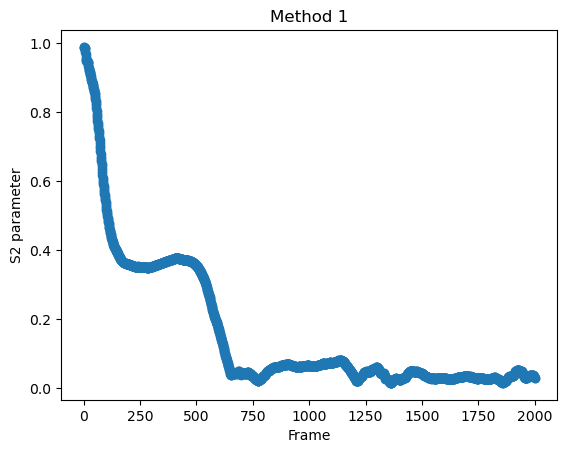

In [11]:
plt.scatter(frames, orders)
plt.xlabel("Frame")
plt.ylabel("S2 parameter")
plt.title("Method 1")

In [17]:
def nop(frame):
    # Get the positional data of all atoms
    positions = frame.particles.position
    # Get the number of molecules
    molecule_ids = frame.bonds.group
    # Assigning the first atoms position to temp variable
    temp = positions[0]
    # Initialize list of vectors
    vectors = []
    posits = []
    # Loop through all atoms with counter i
    for i, pos in enumerate(positions):
        # Check to see if all atoms have been counted
        if i < len(molecule_ids):
            # Addding the vector difference between current and previous atom positions
            # np.stack allows for them to be treated as arrays
            vectors.append(np.stack(pos) - np.stack(temp))
            # Updating temp variable for the next cycle
            temp = pos
            posits.append(pos)
    # Converting the list into an array, ignoring the first one
    vectors = np.array(vectors[1:])
    return vectors, posits

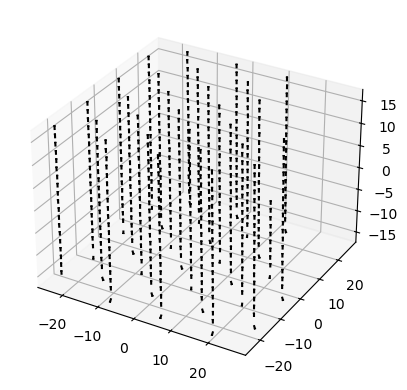

In [33]:
# Plotting the director 
box = traj[1].configuration.box
posit = []
orientations, posit = nop(traj[1])
posit = np.array(posit[1:])
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.quiver3D(
    posit[:, 0],
    posit[:, 1],
    posit[:, 2],
    orientations[:, 0],
    orientations[:, 1],
    orientations[:, 2],
    normalize=True,
    color="black",)


-0.038741384 0.12467965 [-0.02124476 -0.02124634 -0.02123099 ... -0.6949416  -0.69929343
 -0.70206606]


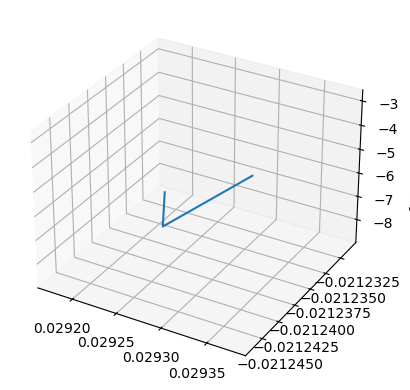

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
directors = np.array(directors)
ax.plot((directors[:3,0]),(directors[:3,1]),(directors[:3,2]))
print(np.average(directors[:]),np.average(directors[:,0]),(directors[:,1]))